In [1]:
import os 

acute_tox_dir = os.getenv('NICEATM_ACUTE_ORAL')

In [3]:
from rdkit import Chem

In [5]:
training_set = Chem.SDMolSupplier(acute_tox_dir + '/trainingset.sdf')

In [19]:
training_set = [mol for mol in training_set if mol is not None]

In [23]:
properties = list(training_set[0].GetPropNames())

In [35]:
properties

['CASRN',
 'DTXSID',
 'Name',
 'Structure_Source',
 'Canonical_QSARr',
 'Salt_Solvent',
 'InChI_Code_QSARr',
 'InChI Key_QSARr',
 'LD50_mgkg',
 'EPA_category',
 'GHS_category',
 'very_toxic',
 'nontoxic']

In [26]:
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

In [28]:
calc = MoleculeDescriptors.MolecularDescriptorCalculator([desc[0] for desc in Descriptors.descList])

In [31]:
import pandas as pd

In [32]:
desc_matrix = [list(calc.CalcDescriptors(mol)) for mol in training_set]

In [37]:
descriptors = pd.DataFrame(desc_matrix, 
                           index=[mol.GetProp('CASRN') for mol in training_set],
                           columns=[desc[0] for desc in Descriptors.descList])

In [41]:
descriptors.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
5894-60-0,5.853844,-2.343297,5.853844,0.829065,0.157160,359.885,326.621,358.141711,122,0,...,0,0,0,0,0,0,0,0,12,0
101-20-2,11.731737,-0.374341,11.731737,0.374341,0.776346,315.587,306.515,313.978046,98,0,...,0,0,0,0,0,0,0,0,0,1
112-05-0,10.088167,-0.666212,10.088167,0.339410,0.578320,158.241,140.097,158.130680,66,0,...,0,0,0,0,0,0,0,0,4,0
11077-03-5,12.767929,-2.654885,12.767929,0.030319,0.011637,2680.170,2455.386,2678.479594,1078,0,...,0,0,0,0,0,0,0,0,7,0
3385-03-3,15.445723,-1.371957,15.445723,0.124858,0.692771,434.504,403.256,434.210467,170,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.preprocessing import scale

In [59]:
descriptors = descriptors.loc[:, ~descriptors.isnull().any()]

In [69]:
descriptors_std = pd.DataFrame(scale(descriptors), index=descriptors.index, columns=descriptors.columns)

C:\Users\Daniel\Anaconda3\envs\cheminf\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Daniel\Anaconda3\envs\cheminf\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [73]:
descriptors_std.std().head()

MaxEStateIndex       1.000056
MinEStateIndex       1.000056
MaxAbsEStateIndex    1.000056
MinAbsEStateIndex    1.000056
qed                  1.000056
dtype: float64

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca_doer = PCA(3)

In [79]:
principal_components = pca_doer.fit_transform(descriptors_std)

In [80]:
principal_components.shape

(8987, 3)

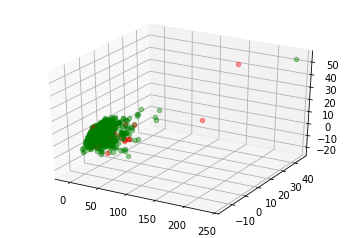

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for pts, mol in zip(principal_components, training_set):
    
    toxic = mol.GetProp('very_toxic').lower()

    if toxic == 'true':
        color = 'r'
    else:
        color = 'g'
    
    ax.scatter(pts[0], pts[1], pts[2], color=color, alpha=0.4)
    
plt.show()